In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pickle
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
df = pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/Bank Loan Case Study/Cleaned Datasets/Final Cleaned Data.csv")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744419 entries, 0 to 744418
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   744419 non-null  float64
 1   NAME_CONTRACT_TYPE           744419 non-null  object 
 2   AMT_APPLICATION              744419 non-null  float64
 3   AMT_CREDIT                   744419 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       744419 non-null  object 
 5   NAME_CONTRACT_STATUS         744419 non-null  object 
 6   DAYS_DECISION                744419 non-null  float64
 7   NAME_PAYMENT_TYPE            744419 non-null  object 
 8   CODE_REJECT_REASON           744419 non-null  object 
 9   NAME_CLIENT_TYPE             744419 non-null  object 
 10  NAME_GOODS_CATEGORY          744419 non-null  object 
 11  NAME_PORTFOLIO               744419 non-null  object 
 12  NAME_PRODUCT_TYPE            744419 non-null  object 
 13 

In [12]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,271877.0,Consumer loans,17145.0,17145.0,XAP,Approved,73.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,middle,POS mobile with interest,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443.0,7392.0,8447.0,4120.0,Laborers,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,3.0,3.0,548.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,122040.0,Cash loans,112500.0,136444.5,XNA,Approved,301.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,high,Cash X-Sell: high,0.0,Cash loans,F,N,Y,3.0,40500.0,284400.0,16456.5,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,10541.0,1177.0,1673.0,1964.0,Core staff,5.0,2.0,2.0,TUESDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Postal,4.0,4.0,301.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
2,202054.0,Cash loans,337500.0,404055.0,Repairs,Refused,781.0,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,1.0,XNA,high,Cash Street: high,0.0,Cash loans,F,N,N,1.0,180000.0,628069.5,34200.0,499500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.028663,10020.0,2507.0,4331.0,2698.0,Laborers,3.0,2.0,2.0,MONDAY,8.0,1.0,1.0,0.0,1.0,1.0,1.0,Security Ministries,3.0,3.0,280.0,0.000000,0.000,0.000000,1.000000,2.000000,8.000000
3,199383.0,Cash loans,315000.0,340573.5,Everyday expenses,Approved,684.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,1.0,XNA,low_normal,Cash X-Sell: low,0.0,Cash loans,M,Y,Y,0.0,157500.0,941472.0,37467.0,841500.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21092.0,93.0,321.0,3900.0,Drivers,2.0,2.0,2.0,THURSDAY,7.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,0.0,0.0,684.0,0.000000,0.000,1.000000,0.000000,0.000000,5.000000
4,342292.0,Cash loans,0.0,0.0,XNA,Canceled,386.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,1.0,XNA,XNA,Cash,0.0,Cash loans,F,N,N,0.0,157500.0,495351.0,30433.5,459000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,18336.0,1838.0,2504.0,1841.0,Sales staff,2.0,2.0,2.0,TUESDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,1.0,1.0,2535.0,0.000000,0.000,0.000000,0.000000,0.000000,5.000000


HANDLING THE IMBALANCED DATA

In [13]:
#according to column description ->1 implies defaulter, 0 implies repayer
df["TARGET"] = df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

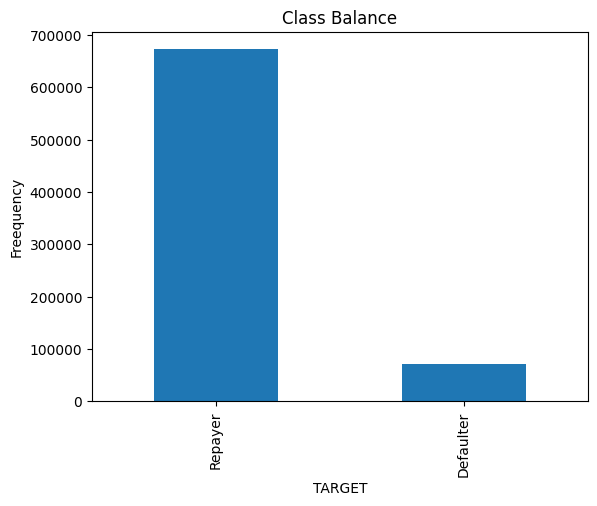

In [14]:
df["TARGET"].value_counts().plot(
 kind = "bar", 
    xlabel = "TARGET", 
    ylabel = "Freequency", 
    title = "Class Balance"
);

In [15]:
target = "TARGET"
X = df.drop(columns= target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (744419, 59)
y shape: (744419,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (595535, 59)
y_train shape: (595535,)
X_test shape: (148884, 59)
y_test shape: (148884,)


In [9]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
X_train_under.head()

(115214, 59)


,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41272,417088.0,Consumer loans,16605.0,14940.0,XAP,Approved,1470.0,XNA,XAP,New,Mobile,POS,XNA,Stone,5.0,Consumer electronics,high,POS mobile with interest,Cash loans,F,N,N,0.0,139500.0,225000.0,15165.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.030755,10781.0,1128.0,928.0,322.0,Core staff,2.0,2.0,2.0,WEDNESDAY,9.0,0.0,0.0,0.0,0.0,1.0,1.0,Government,1.0,1.0,21.0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
340851,190820.0,Cash loans,360000.0,409896.0,XNA,Refused,531.0,Cash through the bank,HC,Repeater,XNA,Cash,x-sell,Contact center,1.0,XNA,middle,Cash X-Sell: middle,Cash loans,F,Y,Y,1.0,94500.0,808650.0,31333.5,675000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.020246,16123.0,2994.0,6795.0,4626.0,High skill tech staff,3.0,3.0,3.0,WEDNESDAY,15.0,0.0,0.0,0.0,0.0,1.0,1.0,Business Entity Type 3,2.0,2.0,251.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
645967,445729.0,Revolving loans,0.0,90000.0,XAP,Approved,2481.0,XNA,XAP,Repeater,XNA,Cards,x-sell,Contact center,0.0,XNA,XNA,Card X-Sell,Cash loans,F,N,N,2.0,180000.0,926365.5,47430.0,828000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,Municipal apartment,0.009334,12423.0,1774.0,7077.0,1546.0,Sales staff,4.0,2.0,2.0,TUESDAY,15.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,2.0,2.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
137224,416645.0,Cash loans,90000.0,115893.0,Urgent needs,Refused,595.0,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,1.0,XNA,high,Cash Street: high,Cash loans,M,N,Y,0.0,180000.0,521280.0,37201.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.007020,17851.0,304.0,3980.0,1391.0,Laborers,2.0,2.0,2.0,MONDAY,14.0,0.0,0.0,0.0,1.0,1.0,0.0,Business Entity Type 3,4.0,4.0,774.0,0.000000,0.000,0.000000,0.000000,0.000000,6.000000
169564,147129.0,Consumer loans,41067.0,43236.0,XAP,Approved,1013.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,20.0,Connectivity,high,POS mobile with interest,Cash loans,F,N,Y,0.0,90000.0,134775.0,7438.5,112500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.007020,14368.0,841.0,8325.0,4721.0,Laborers,1.0,2.0,2.0,THURSDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Other,3.0,3.0,433.0,0.000000,0.000,0.000000,0.000000,0.000000,3.000000


In [10]:
y_train_under.value_counts(normalize=True)

TARGET
Defaulter    0.5
Repayer      0.5
Name: proportion, dtype: float64

In [11]:
y_train_under.head()

41272     Defaulter
340851    Defaulter
645967    Defaulter
137224    Defaulter
169564    Defaulter
Name: TARGET, dtype: object

In [17]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)
X_train_over.head()

(1075856, 59)


,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,111187.0,Revolving loans,0.0,67500.0,XAP,Approved,2844.0,XNA,XAP,Repeater,XNA,Cards,x-sell,Contact center,1.0,XNA,XNA,Card Street,Cash loans,M,N,Y,2.0,157500.0,254700.0,25321.5,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.028663,16171.0,186.0,10086.0,4326.0,Drivers,4.0,2.0,2.0,WEDNESDAY,13.0,0.0,1.0,1.0,0.0,1.0,1.0,Industry: type 9,4.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0
1,125026.0,Consumer loans,183600.0,165240.0,XAP,Refused,2236.0,XNA,LIMIT,Repeater,Vehicles,POS,XNA,Stone,104.0,Industry,low_normal,POS others without interest,Cash loans,F,N,Y,0.0,202500.0,981000.0,28683.0,981000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.028663,18950.0,11487.0,4354.0,2500.0,Medicine staff,1.0,2.0,2.0,TUESDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Medicine,0.0,0.0,2236.0,0.0,0.0,0.0,1.0,0.0,1.0
2,258810.0,Cash loans,0.0,0.0,XNA,Canceled,83.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,1.0,XNA,XNA,Cash,Cash loans,F,N,Y,1.0,180000.0,463131.0,23773.5,346500.0,Other_A,Working,Secondary / secondary special,Civil marriage,House / apartment,0.002042,16389.0,3272.0,462.0,4787.0,Sales staff,3.0,3.0,3.0,TUESDAY,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.0,0.0,1658.0,0.0,0.0,0.0,0.0,1.0,2.0
3,363517.0,Revolving loans,0.0,90000.0,XAP,Refused,1321.0,XNA,HC,Repeater,XNA,Cards,walk-in,Credit and cash offices,0.0,XNA,XNA,Card Street,Revolving loans,F,N,Y,0.0,360000.0,382500.0,19125.0,382500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,18020.0,4238.0,7139.0,1565.0,Medicine staff,2.0,2.0,2.0,TUESDAY,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Medicine,2.0,2.0,1738.0,0.0,0.0,0.0,0.0,0.0,1.0
4,201655.0,Consumer loans,16101.0,15966.0,XAP,Approved,2175.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,80.0,Connectivity,high,POS mobile with interest,Cash loans,F,N,N,0.0,45000.0,326439.0,11853.0,229500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.020246,19906.0,5547.0,6701.0,3452.0,Laborers,1.0,3.0,3.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Government,0.0,0.0,412.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595535 entries, 693356 to 121958
Data columns (total 59 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   595535 non-null  float64
 1   NAME_CONTRACT_TYPE           595535 non-null  object 
 2   AMT_APPLICATION              595535 non-null  float64
 3   AMT_CREDIT                   595535 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       595535 non-null  object 
 5   NAME_CONTRACT_STATUS         595535 non-null  object 
 6   DAYS_DECISION                595535 non-null  float64
 7   NAME_PAYMENT_TYPE            595535 non-null  object 
 8   CODE_REJECT_REASON           595535 non-null  object 
 9   NAME_CLIENT_TYPE             595535 non-null  object 
 10  NAME_GOODS_CATEGORY          595535 non-null  object 
 11  NAME_PORTFOLIO               595535 non-null  object 
 12  NAME_PRODUCT_TYPE            595535 non-null  object 
 13 

In [18]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1075856 entries, 0 to 1075855
Data columns (total 59 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1075856 non-null  float64
 1   NAME_CONTRACT_TYPE           1075856 non-null  object 
 2   AMT_APPLICATION              1075856 non-null  float64
 3   AMT_CREDIT                   1075856 non-null  float64
 4   NAME_CASH_LOAN_PURPOSE       1075856 non-null  object 
 5   NAME_CONTRACT_STATUS         1075856 non-null  object 
 6   DAYS_DECISION                1075856 non-null  float64
 7   NAME_PAYMENT_TYPE            1075856 non-null  object 
 8   CODE_REJECT_REASON           1075856 non-null  object 
 9   NAME_CLIENT_TYPE             1075856 non-null  object 
 10  NAME_GOODS_CATEGORY          1075856 non-null  object 
 11  NAME_PORTFOLIO               1075856 non-null  object 
 12  NAME_PRODUCT_TYPE            1075856 non-n

In [10]:
y_train_over.value_counts(normalize=True)

TARGET
Repayer      0.5
Defaulter    0.5
Name: proportion, dtype: float64

In [11]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9033


In [12]:
numerical_features = []
for i in X_train :
  if (X_train[i].dtypes == 'int64') or (X_train[i].dtypes == 'float64') : # outliers can be visible if it is numerical data
    numerical_features.append(i)

In [13]:
# Preprocessing for numerical data
numerical_transformer = 'passthrough'

In [14]:
categorical_features = []
for i in X_train.columns:
    if not pd.api.types.is_numeric_dtype(X_train[i]):
        categorical_features.append(i)

In [15]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
# Combinning preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [17]:
# Creating a pipeline that combines preprocessing and the classifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [21]:
# Fit on `X_train`, `y_train`
model_reg = model_pipeline.fit(X_train, y_train)

In [23]:
# Fit on `X_train_under`, `y_train_under`
model_under = model_pipeline.fit(X_train_under, y_train_under)

In [18]:
# Fit on `X_train_over`, `y_train_over`
model_over = model_pipeline.fit(X_train_over, y_train_over)

In [22]:
print(model_reg.score(X_train,y_train))
print(model_reg.score(X_test,y_test))

1.0
0.9638443351871255


In [24]:
print(model_under.score(X_train,y_train))
print(model_under.score(X_test,y_test))

0.8226048846835199
0.7896281668950323


In [19]:
print(model_over.score(X_train,y_train))
print(model_over.score(X_test,y_test))

1.0
0.9633070041105828


In [20]:
# Access the trained DecisionTreeClassifier
decision_tree = model_pipeline.named_steps['classifier']

In [21]:
tree_depth = decision_tree.get_depth()
print(f"Tree Depth: {tree_depth}")

Tree Depth: 84


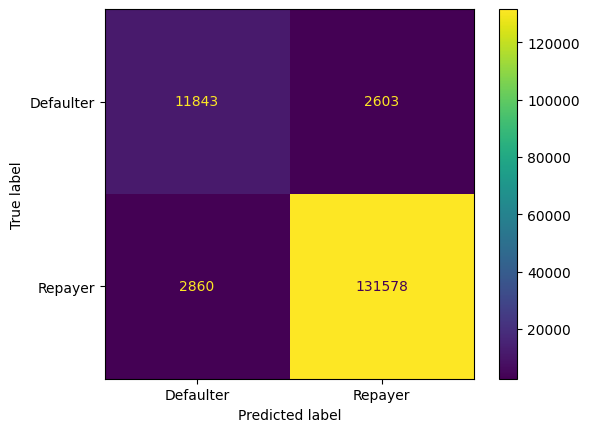

In [22]:
# Plotting confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [23]:
# Extract the feature importances
feature_importances = decision_tree.feature_importances_

In [24]:
# Get the feature names from the preprocessor
preprocessor = model_pipeline.named_steps['preprocessor']
# Numerical feature names remain the same
numerical_feature_names = numerical_features
# Get categorical feature names after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)

In [25]:
# Combine all feature names
all_feature_names = numerical_feature_names + list(categorical_feature_names)

In [26]:
# Create a Series with feature importances
feat_imp = pd.Series(feature_importances, index=all_feature_names).sort_values(ascending = False)
feat_imp

DAYS_EMPLOYED                                                  0.075607
DAYS_BIRTH                                                     0.061843
AMT_ANNUITY                                                    0.061162
DAYS_LAST_PHONE_CHANGE                                         0.060089
DAYS_ID_PUBLISH                                                0.059241
DAYS_REGISTRATION                                              0.056853
SK_ID_CURR                                                     0.056521
AMT_CREDIT_PREV                                                0.046466
REGION_POPULATION_RELATIVE                                     0.039660
AMT_INCOME_TOTAL                                               0.038454
AMT_GOODS_PRICE                                                0.035200
AMT_REQ_CREDIT_BUREAU_YEAR                                     0.030298
HOUR_APPR_PROCESS_START                                        0.029385
NAME_EDUCATION_TYPE_Higher education                           0

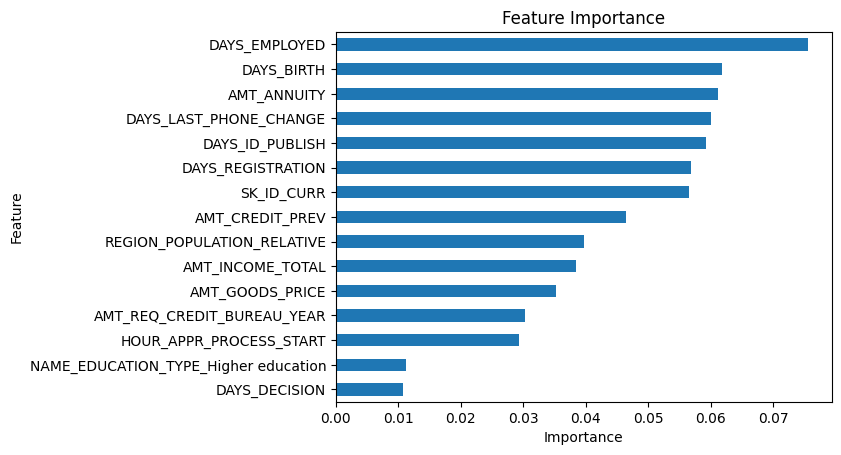

In [34]:
# Putting importances into a Series
feat_imp = pd.Series(feature_importances, index=all_feature_names).sort_values()
# Plotting series
feat_imp.tail(15).plot(kind = "barh")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [35]:
# Save your model as `"model-5-2.pkl"`
with open("Prediction_model.pkl", "wb") as f:
    pickle.dump(model_over, f)

In [36]:
# Load `"model-5-2.pkl"`
with open("prediction_model.pkl","rb") as f:
    loaded_model= pickle.load(f)
print(loaded_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['SK_ID_CURR',
                                                   'AMT_APPLICATION',
                                                   'AMT_CREDIT',
                                                   'DAYS_DECISION',
                                                   'SELLERPLACE_AREA',
                                                   'CNT_CHILDREN',
                                                   'AMT_INCOME_TOTAL',
                                                   'AMT_CREDIT_PREV',
                                                   'AMT_ANNUITY',
                                                   'AMT_GOODS_PRICE',
                                                   'REGION_POPULATION_RELATIVE',
                                                   'DAYS_BIRTH',
                                                   'DAYS_EMPLOYED'

In [27]:
# Filter features with importance greater than 0.01
important_features = feat_imp[feat_imp > 0.01]

In [29]:
# Display the important features
print("Features with importance greater than 0.01:")
print(important_features)

Features with importance greater than 0.01:
DAYS_EMPLOYED                           0.075607
DAYS_BIRTH                              0.061843
AMT_ANNUITY                             0.061162
DAYS_LAST_PHONE_CHANGE                  0.060089
DAYS_ID_PUBLISH                         0.059241
DAYS_REGISTRATION                       0.056853
SK_ID_CURR                              0.056521
AMT_CREDIT_PREV                         0.046466
REGION_POPULATION_RELATIVE              0.039660
AMT_INCOME_TOTAL                        0.038454
AMT_GOODS_PRICE                         0.035200
AMT_REQ_CREDIT_BUREAU_YEAR              0.030298
HOUR_APPR_PROCESS_START                 0.029385
NAME_EDUCATION_TYPE_Higher education    0.011253
DAYS_DECISION                           0.010675
OBS_60_CNT_SOCIAL_CIRCLE                0.010258
dtype: float64


In [30]:
# Filter features with importance greater than 0.01
important_features = feat_imp[feat_imp > 0.01].index.tolist()

In [31]:
important_features

['DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'AMT_ANNUITY',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'DAYS_REGISTRATION',
 'SK_ID_CURR',
 'AMT_CREDIT_PREV',
 'REGION_POPULATION_RELATIVE',
 'AMT_INCOME_TOTAL',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'NAME_EDUCATION_TYPE_Higher education',
 'DAYS_DECISION',
 'OBS_60_CNT_SOCIAL_CIRCLE']